In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Recent date in the data set: {recent_date[0]}")

Recent date in the data set: 2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
#Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
past_year = dt.date(2017,8,23)-dt.timedelta(days=365)
prcp_lastyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= past_year).all()


In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_lastyear, columns = ['date', 'precipitation'])
prcp_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [12]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')



In [13]:
#index reset needed to plot
prcp_df.set_index('date', inplace = True)

In [14]:
#Drop NA values if any
prcp_df = prcp_df.dropna(how="any")


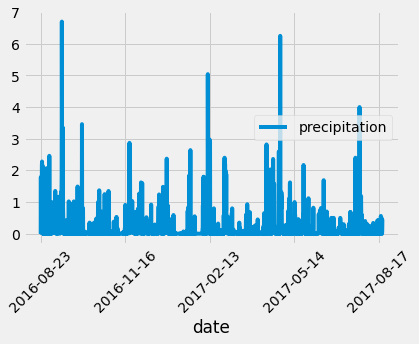

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)
plt.savefig("Precipitation.png")
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).distinct().count()
print(f'The dataset has total of {total_stations} stations.')

The dataset has total of 9 stations.


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_station).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
pastyear_temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == "USC00519281").filter(Measurement.date >="2016-08-23").filter(Measurement.date <="2017-08-23").\
all()

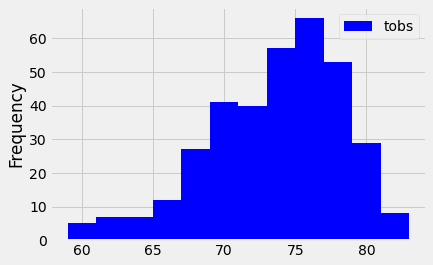

In [21]:
# convert to dataframe
temp_df = pd.DataFrame(pastyear_temp)

# Plot histogram 
temp_df.plot.hist(bins=12,rwidth=1.0,color="blue")

plt.savefig("Temp_Plot.png")

# Close session

In [22]:
# Close Session
session.close()